In [40]:
# final_data.index[np.isinf(final_data).any(1)]



A2_A1_ratio    A2_A1_ratio
dtype: object

In [84]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

feats_file = 'C:/Users/numan98khan/Desktop/HemaRays/research/HemaRays_Data_OneFourth/dump/features/fiducial_points.csv'

data = pd.read_csv(feats_file)

# del data['folder_name']
data

dec_df = data['filename'].str.split("_", expand=True)

del dec_df[0]
del dec_df[2]
del dec_df[4]
del dec_df[6]
del dec_df[7]

dec_df.columns = ['gender', 'age', 'HB']

dec_df['HB'] = dec_df['HB'].str.replace("p", ".").astype('float')
dec_df['age'] = dec_df['age'].astype('int')

dec_df

final_data = pd.concat([dec_df, data], axis=1)

del final_data['filename'] 


## Either drop the NaNs
# final_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# final_data = final_data.dropna()
# display(final_data)

## Or remove the col causing the issue
##  Has some inf values so we'll just drop them as they had no gret
## Cols dropped : A2_A1_ratio, A2_A1_ratio
del final_data['A2_A1_ratio']

# gender_dummies = pd.get_dummies(final_data.gender)
# final_data = pd.concat([final_data, gender_dummies], axis=1)

# correlation = final_data.corr(method='pearson')
# columns = correlation.nlargest(10, 'HB').index
# print(columns)

# correlation_map = np.corrcoef(final_data[columns].values.T)
# # print(correlation_map)

# sns.set(font_scale=1.0)
# heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

# plt.show()
del final_data['gender'] 
del final_data['folder_name'] 

display(final_data)



X = final_data# [columns]
y = X['HB']# .values
X = X.drop('HB', axis = 1)# .values

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=42)


,age,HB,meta_counter,peak_to_peak_t,systolic_peak_index,dychrotic_notch_index,diastolic_peak_index,A2_area,A1_area,a1,...,ta1,tb1,a2,b2,ta2,tb2,b2_a2,systolic_peak_c,dychrotic_notch_c,diastolic_peak_c
0,19,12.0,0.0,146.0,38.0,184.0,184.0,48.246776,0.407373,0.036553,...,109.0,77.0,0.013199,-0.018090,64.0,88.0,-1.370538,1.0,1.0,1.0
1,19,12.0,1.0,0.0,0.0,0.0,0.0,0.000000,58.808832,0.027934,...,120.0,81.0,0.008710,-0.011976,70.0,99.0,-1.374946,1.0,1.0,1.0
2,19,12.0,2.0,0.0,40.0,40.0,40.0,0.205787,56.175362,0.025171,...,147.0,118.0,0.011138,-0.019501,105.0,136.0,-1.750831,1.0,1.0,1.0
3,19,12.0,3.0,0.0,36.0,36.0,36.0,5.736505,62.607258,0.029107,...,144.0,118.0,0.008872,-0.017565,104.0,133.0,-1.979821,1.0,1.0,1.0
4,19,12.0,4.0,0.0,28.0,28.0,28.0,0.777284,60.505680,0.026948,...,150.0,110.0,0.007310,-0.014503,179.0,129.0,-1.983925,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,57,15.6,69.0,116.0,75.0,191.0,191.0,110.239252,0.022934,0.016386,...,149.0,27.0,0.006652,-0.004672,17.0,52.0,-0.702343,1.0,1.0,1.0
1410,57,15.6,70.0,0.0,0.0,0.0,0.0,0.000000,109.097080,0.014663,...,125.0,38.0,0.006262,-0.005371,25.0,50.0,-0.857602,1.0,1.0,1.0
1411,57,15.6,71.0,122.0,60.0,182.0,182.0,107.983789,0.243390,0.013303,...,141.0,35.0,0.006462,-0.007515,18.0,45.0,-1.162927,1.0,1.0,1.0
1412,57,15.6,72.0,104.0,72.0,176.0,176.0,100.409794,8.655402,0.008271,...,100.0,43.0,0.009163,-0.008735,25.0,58.0,-0.953304,1.0,1.0,1.0


In [89]:
## Putting all the features on the same scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transformed = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_transformed.head()

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(1)
selector.fit(X_transformed)
var_thres_X = X_transformed[X_transformed.columns[selector.get_support()]]

var_thres_X = pd.concat([var_thres_X, final_data[['HB']]], axis = 1)


display(var_thres_X)

X = var_thres_X# [columns]
y = X['HB']# .values
X = X.drop('HB', axis = 1)# .values

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=42)

model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(X_train, y_train)

# transform the validation dataset
# rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(X_test)
print('mean_squared_error', mean_squared_error(y_test, predictions))

print(model.score(X_test, y_test))


,tb1,tb2,HB
0,-0.098698,-0.473979,12.0
1,0.008717,-0.178722,12.0
2,1.002302,0.814414,12.0
3,1.002302,0.733890,12.0
4,0.787473,0.626523,12.0
...,...,...,...
1409,-1.441380,-1.440273,15.6
1410,-1.145990,-1.493956,15.6
1411,-1.226551,-1.628164,15.6
1412,-1.011721,-1.279224,15.6


mean_squared_error 3.3374875469016714
0.17796262554997666


In [90]:
## Select top 2 features based on mutual info regression
## another method to get features
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(mutual_info_regression, k =2)
selector.fit(X, y)
X.columns[selector.get_support()]

skb_X = X[X.columns[selector.get_support()]]

skb_X = pd.concat([skb_X, final_data[['HB']]], axis = 1)

display(skb_X)


X = skb_X# [columns]
y = X['HB']# .values
X = X.drop('HB', axis = 1)# .values

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=42)

model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(X_train, y_train)

# transform the validation dataset
# rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(X_test)
print('mean_squared_error', mean_squared_error(y_test, predictions))

print(model.score(X_test, y_test))


,tb1,tb2,HB
0,-0.098698,-0.473979,12.0
1,0.008717,-0.178722,12.0
2,1.002302,0.814414,12.0
3,1.002302,0.733890,12.0
4,0.787473,0.626523,12.0
...,...,...,...
1409,-1.441380,-1.440273,15.6
1410,-1.145990,-1.493956,15.6
1411,-1.226551,-1.628164,15.6
1412,-1.011721,-1.279224,15.6


mean_squared_error 3.3374875469016714
0.17796262554997666


In [73]:
## Trying the pca pipeline
## This variation is done with 2d principal components

# Standardizing the features
x_scaled = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, final_data[['HB']]], axis = 1)

# display(principalDf)
display(finalDf)

,principal component 1,principal component 2,HB
0,0.364265,1.068960,12.0
1,-0.571025,-0.875455,12.0
2,0.386151,-0.922109,12.0
3,0.337860,-0.999520,12.0
4,0.293971,-1.169576,12.0
...,...,...,...
1409,-1.364482,1.431306,15.6
1410,-2.037713,-0.812345,15.6
1411,-1.310032,1.362662,15.6
1412,-1.315744,1.378862,15.6


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

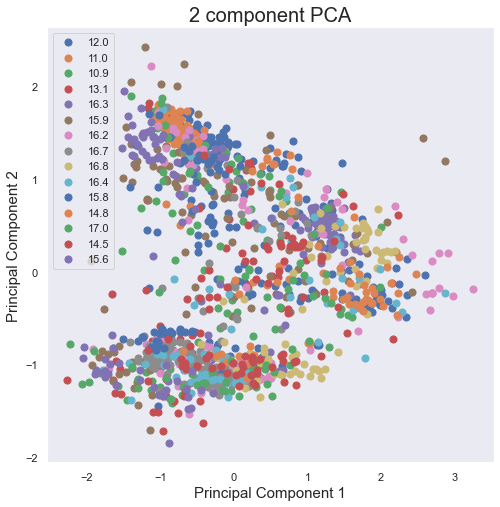

In [74]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = finalDf['HB'].unique()

colors = sns.color_palette(None, len(targets))
# targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# colors = ['r', 'g', 'b']

c_counter = 0
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['HB'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

X = finalDf# [columns]
y = X['HB']# .values
X = X.drop('HB', axis = 1)# .values

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=42)


# scaler = StandardScaler().fit(X_train)
# rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(X_train, y_train)

# transform the validation dataset
# rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(X_test)
print('mean_squared_error', mean_squared_error(y_test, predictions))


## performed very poorly
# mean_squared_error 3.4690515966068025



mean_squared_error 3.4690515966068025
